<a href="https://colab.research.google.com/github/vishnupriya-ms/My-Projects/blob/main/LinkedINPoll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/linkedin Data.csv")
df

,Quiz_number,Total_Views,Total_Responses,Right_Answers,Total_Likes,Avg_right,Max_Right
0,1,134100,3486,1424,84,41%,Yes
1,2,172686,5669,4093,139,72%,Yes
2,3,113495,2128,1175,74,55%,Yes
3,4,73924,347,142,33,41%,Yes
4,5,100538,1559,917,54,59%,Yes
...,...,...,...,...,...,...,...
95,96,111743,1385,769,64,56%,Yes
96,97,53757,504,355,30,70%,Yes
97,98,84803,1182,488,62,41%,No
98,99,72729,730,339,50,46.44%,Yes


# **DATA EXPLORATION**

In [ ]:
df.head()

,Quiz_number,Total_Views,Total_Responses,Right_Answers,Total_Likes,Avg_right,Max_Right
0,1,134100,3486,1424,84,41%,Yes
1,2,172686,5669,4093,139,72%,Yes
2,3,113495,2128,1175,74,55%,Yes
3,4,73924,347,142,33,41%,Yes
4,5,100538,1559,917,54,59%,Yes


In [ ]:
df.tail()

,Quiz_number,Total_Views,Total_Responses,Right_Answers,Total_Likes,Avg_right,Max_Right
95,96,111743,1385,769,64,56%,Yes
96,97,53757,504,355,30,70%,Yes
97,98,84803,1182,488,62,41%,No
98,99,72729,730,339,50,46.44%,Yes
99,100,84737,1674,855,57,51.08%,Yes


In [ ]:
df.isna().sum()

Quiz_number        0
Total_Views        0
Total_Responses    0
Right_Answers      0
Total_Likes        0
Avg_right          0
Max_Right          0
dtype: int64

In [ ]:
df.size

700

In [ ]:
df.shape

(100, 7)

In [ ]:
df['Total_Views'].max()

172686

In [ ]:
df['Avg_right'].max()

86.0

In [ ]:
df['Avg_right'].min()

12.0

# **DATA VISUALISATION**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

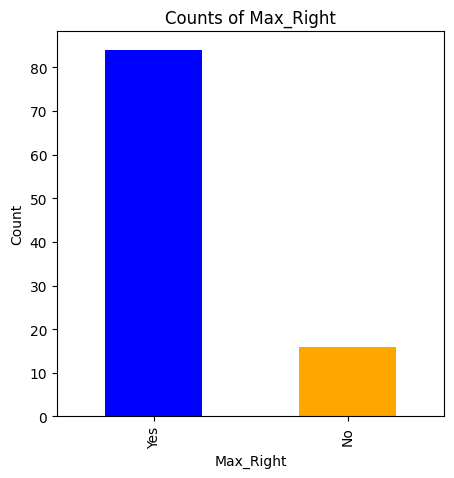

In [ ]:
max_right_counts = df['Max_Right'].value_counts()
plt.figure(figsize=(5, 5))
max_right_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Counts of Max_Right')
plt.xlabel('Max_Right')
plt.ylabel('Count')
plt.show()


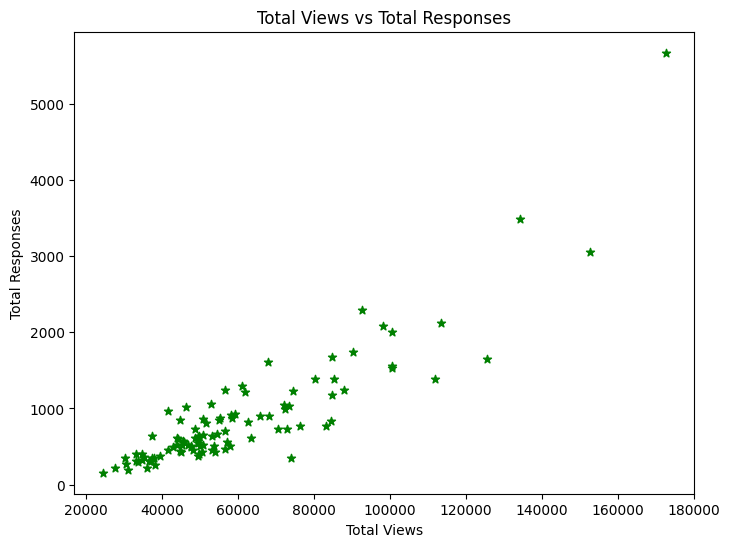

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Total_Views'], df['Total_Responses'], c='green', marker='*')
plt.title('Total Views vs Total Responses')
plt.xlabel('Total Views')
plt.ylabel('Total Responses')
plt.show()


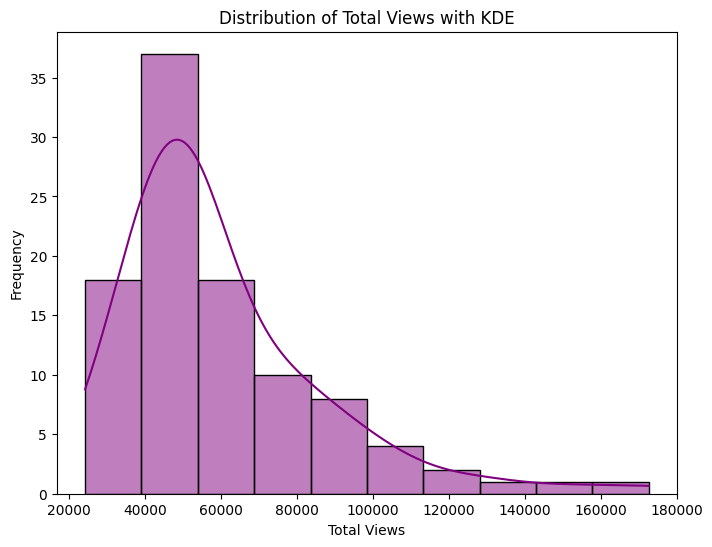

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Total_Views'], bins=10, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Total Views with KDE')
plt.xlabel('Total Views')
plt.ylabel('Frequency')
plt.show()

# **DATA PREPROCESS**

In [ ]:
df['Avg_right'] = (df['Right_Answers'] / df['Total_Responses']) * 100

In [ ]:
df['Avg_right'] = df['Avg_right'].round(0)
df['Avg_right'] = df['Avg_right'].astype(float)


# **DATA SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.iloc[:,:-1]
x

,Quiz_number,Total_Views,Total_Responses,Right_Answers,Total_Likes,Avg_right
0,1,134100,3486,1424,84,41.0
1,2,172686,5669,4093,139,72.0
2,3,113495,2128,1175,74,55.0
3,4,73924,347,142,33,41.0
4,5,100538,1559,917,54,59.0
...,...,...,...,...,...,...
95,96,111743,1385,769,64,56.0
96,97,53757,504,355,30,70.0
97,98,84803,1182,488,62,41.0
98,99,72729,730,339,50,46.0


In [ ]:
y=df.iloc[:,-1]
y

0     Yes
1     Yes
2     Yes
3     Yes
4     Yes
     ... 
95    Yes
96    Yes
97     No
98    Yes
99    Yes
Name: Max_Right, Length: 100, dtype: object

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# **NORMALIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train=scaler.transform(x_train)


In [ ]:
x_test=scaler.transform(x_test)

# **MODEL CREATION**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred=knn.predict(x_test)
y_pred


array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes'], dtype=object)

# **PERFORMANCE EVALUATION**

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score

In [ ]:
mat=confusion_matrix(y_pred,y_test)
mat

array([[ 2,  1],
       [ 2, 25]])

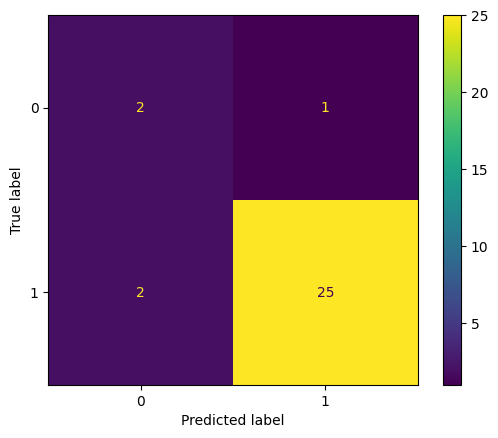

In [ ]:
cmd=ConfusionMatrixDisplay(mat)
cmd.plot()
plt.show()


In [ ]:
score=accuracy_score(y_pred,y_test)
score

0.9

# **MODEL II- SUPPORT VECTOR CLASSIFICATION**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()

In [ ]:
svc.fit(x_train,y_train)

SVC()

In [ ]:
y_pred1=svc.predict(x_test)
y_pred1

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes'], dtype=object)

# **PERFORMANCE EVALUATION**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [ ]:
mat=confusion_matrix(y_pred1,y_test)
mat

array([[ 2,  1],
       [ 2, 25]])

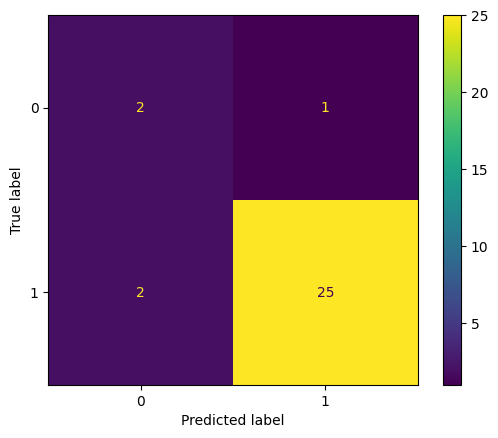

In [ ]:
cmd=ConfusionMatrixDisplay(mat)
cmd.plot()
plt.show()

In [ ]:
score=accuracy_score(y_pred1,y_test)
score

0.9